In [1]:
#Data handling
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

%cd /content/drive/MyDrive/deeplearning/policeproject

Mounted at /content/drive
/content/drive/MyDrive/deeplearning/policeproject


In [2]:
#data from the Mapping Police Violence 2011-2021
mpv = pd.read_excel('MPVDatasetDownload.xlsx', sheet_name='2013-2020 Police Killings')

##Data Cleaning and Merging

In [3]:
print(mpv.columns)

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Armed/Unarmed Status',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/201

What is the number of records we are investigating?

In [4]:
#create fatal or nonfatal distinction
df = mpv
df.shape

(8941, 36)

What is the division of killings on gender? How does it differ between fatal and non fatal encounters?

In [7]:
df["Victim's gender"] = df["Victim's gender"].str.replace(' ', '')
df["Victim's gender"].value_counts()

Male           8471
Female          445
Transgender       9
Unknown           6
Name: Victim's gender, dtype: int64

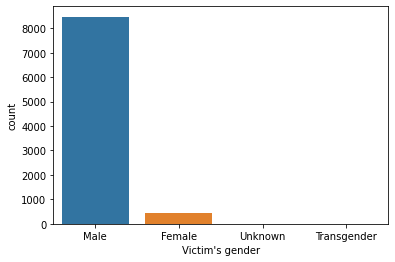

In [8]:
sns.countplot(x="Victim's gender", data=df)

Are the differences between genders significant in terms of deaths?

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Race
How does a victim's race impact their likelihood of being killed?

In [16]:
df["Victim's race"] = df["Victim's race"].replace(to_replace=r"white\b", value='White',regex=True)
df["Victim's race"] = df["Victim's race"].replace(to_replace=r" ", value='',regex=True)

df["Victim's race"].value_counts()

White              3869
Black              2221
Hispanic           1526
Unknownrace         941
Asian               132
NativeAmerican      122
UnknownRace          68
PacificIslander      49
Name: Victim's race, dtype: int64

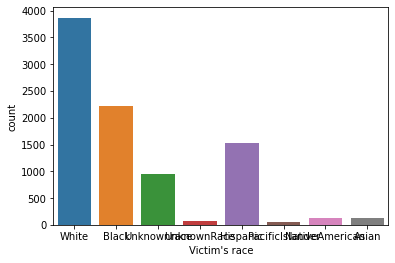

In [17]:
sns.countplot(x="Victim's race", data=df)

What other interesting variables can we look at that might have significance in these violent outcomes?

In [20]:
df["Armed/Unarmed Status"] = df["Armed/Unarmed Status"].replace(to_replace=r"armed\b", value='Armed',regex=True)
df["Armed/Unarmed Status"] = df["Armed/Unarmed Status"].replace(to_replace=r"unclear\b", value='Unclear',regex=True)

df["Armed/Unarmed Status"].value_counts()

Allegedly Armed                       6424
UnArmed/Did Not Have Actual Weapon    1194
Unclear                                735
Vehicle                                588
Name: Armed/Unarmed Status, dtype: int64

In [28]:
df[df["Victim's race"] == 'Black'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Zipcode                                       50304.846745
WaPo ID (If included in WaPo database)         3175.493361
MPV ID                                         4178.763736
Fatal Encounters ID                           19993.175829
order                                           580.000000
Known Past Shootings of Officer(s) (DRAFT)        1.363636
dtype: float64

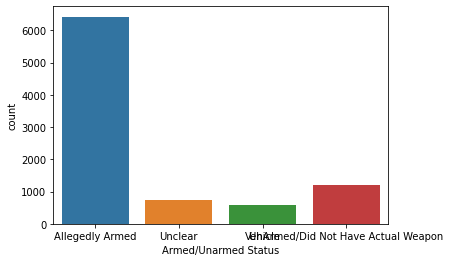

In [29]:
sns.countplot(x="Armed/Unarmed Status", data=df)

In [50]:
df['Known Past Shootings of Officer(s) (DRAFT)'].replace(to_replace="No\b", value=0, regex=True)
df['Known Past Shootings of Officer(s) (DRAFT)'].value_counts()

1     22
2      5
3      4
No     1
4      1
Name: Known Past Shootings of Officer(s) (DRAFT), dtype: int64

In [55]:
df["Victim's age"].value_counts()
vals = ['40s','Unknown']
for i in vals:
  df.drop(df.loc[df["Victim's age"]==i].index, inplace=True)

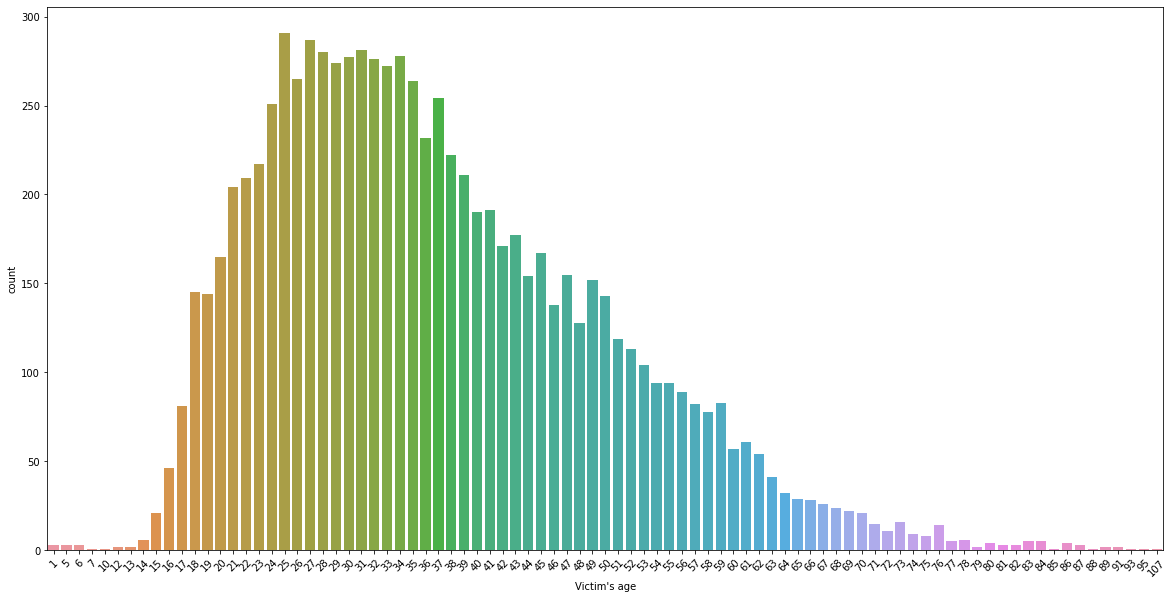

In [56]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
sns.countplot(x="Victim's age", data=df)

In [65]:
print("The average age of victims was",df["Victim's age"].mean(),"and the median age was", df["Victim's age"].median())
black_df = df[df["Victim's race"] == "Black"] 
print("Among Black victims, the average age of death was", black_df["Victim\'s age"].mean(), "and the median age was", black_df["Victim's age"].median() )

The average age of victims was 36.844893691181596 and the median age was 35.0
Among Black victims, the average age of death was 32.37038724373576 and the median age was 30.0


In [66]:
pd.crosstab(df["Victim's race"],df['Armed/Unarmed Status']).transpose()

Victim's race,Asian,Black,Hispanic,NativeAmerican,PacificIslander,UnknownRace,Unknownrace,White
Armed/Unarmed Status,,,,,,,,
Allegedly Armed,104,1494,1012,80,33,50,600,2828
UnArmed/Did Not Have Actual Weapon,13,369,218,12,6,2,56,493
Unclear,9,165,148,22,3,10,62,275
Vehicle,4,169,103,4,7,6,43,233
